<h1 style="color:#DBAE58; font-family: 'Arial', sans-serif;">E-commerce Customer Segmentation and Prediction</h1>

<h1 style="color:#DBAE58; font-family: 'Arial', sans-serif;">Problem Statement</h1>

<p style="font-size:18px; line-height:1.6; font-family: 'Arial', sans-serif;">
    In the competitive world of e-commerce, businesses rely on <strong>data-driven strategies</strong> to boost customer engagement, optimize marketing efforts, and improve customer retention. One effective strategy is <em>customer segmentation</em>, where customers are grouped based on behavioral attributes such as purchase frequency, recency, and spending patterns.
</p>

<p style="font-size:18px; line-height:1.6; font-family: 'Arial', sans-serif;">
    Predicting future customer behavior can also help businesses allocate resources more efficiently and tailor customer experiences. The aim of this project is to segment customers of an e-commerce platform using historical transactional data to gain insights into different customer profiles. These insights will help the business develop targeted marketing strategies, improve customer retention, and ultimately increase revenue.
</p>


<h1 style="color:#DBAE58; font-family: 'Arial', sans-serif;">Project Objectives</h1>

<p style="font-size:18px; line-height:1.6; font-family: 'Arial', sans-serif;">
   1. <b>Conduct Comprehensive Exploratory Data Analysis (EDA):</b>
Perform detailed analysis of customer behavior and purchasing patterns to gain insights into key trends and characteristics within the data.
</p>

<p style="font-size:18px; line-height:1.6; font-family: 'Arial', sans-serif;">
   2. <b>Feature Engineering for Segmentation:</b>
Identify and analyze the key customer attributes, such as Recency, Frequency, and Monetary (RFM) values, to create features that drive effective segmentation.
</p>

<p style="font-size:18px; line-height:1.6; font-family: 'Arial', sans-serif;">
  3. <b>Implement and Compare Segmentation Algorithms:</b>
Apply and evaluate various clustering techniques, including K-means, hierarchical clustering, and DBSCAN, to identify the most effective customer segments.
</p>

<p style="font-size:18px; line-height:1.6; font-family: 'Arial', sans-serif;">
  4. <b>Evaluate Model Performance:</b>
Compare the performance of the different clustering methods using appropriate metrics (e.g., silhouette score) to determine the best model for segmenting customers..
</p>

<h1 style="color:#DBAE58; font-family: 'Arial', sans-serif;">Step 1: Import Libraries</h1>

In [61]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import scipy.cluster.hierarchy as sch 
from sklearn.cluster import AgglomerativeClustering 
from __future__ import print_function

from sklearn.cluster import DBSCAN

import ipywidgets as widgets
from IPython.display import display, HTML

import warnings
warnings.filterwarnings('ignore')

<h1 style="color:#DBAE58; font-family: 'Arial', sans-serif;">Step 2: Data Cleaning & Preparation</h1>

<p style="font-size:18px; line-height:1.6; font-family: 'Arial', sans-serif;">
   <h4>let's load the dataset:</h4>
   The dataset contains the following columns:
</p>
<table style="width:100%; border: 1px solid #ddd; border-collapse: collapse; font-family: Arial, sans-serif;">
  <thead>
    <tr>
      <th style="border: 1px solid #ddd; padding: 8px; text-align: left;"><b>Column Name</b></th>
      <th style="border: 1px solid #ddd; padding: 8px; text-align: left;"><b>Description</b></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="border: 1px solid #ddd; padding: 8px;">InvoiceNo</td>
      <td style="border: 1px solid #ddd; padding: 8px;">Invoice number for the transaction.</td>
    </tr>
    <tr>
      <td style="border: 1px solid #ddd; padding: 8px;">StockCode</td>
      <td style="border: 1px solid #ddd; padding: 8px;">Product code.</td>
    </tr>
    <tr>
      <td style="border: 1px solid #ddd; padding: 8px;">Description</td>
      <td style="border: 1px solid #ddd; padding: 8px;">Description of the product.</td>
    </tr>
    <tr>
      <td style="border: 1px solid #ddd; padding: 8px;">Quantity</td>
      <td style="border: 1px solid #ddd; padding: 8px;">Quantity of items purchased.</td>
    </tr>
    <tr>
      <td style="border: 1px solid #ddd; padding: 8px;">InvoiceDate</td>
      <td style="border: 1px solid #ddd; padding: 8px;">Date and time of the invoice.</td>
    </tr>
    <tr>
      <td style="border: 1px solid #ddd; padding: 8px;">UnitPrice</td>
      <td style="border: 1px solid #ddd; padding: 8px;">Price of a single unit.</td>
    </tr>
    <tr>
      <td style="border: 1px solid #ddd; padding: 8px;">CustomerID</td>
      <td style="border: 1px solid #ddd; padding: 8px;">Unique identifier for the customer.</td>
    </tr>
    <tr>
      <td style="border: 1px solid #ddd; padding: 8px;">Country</td>
      <td style="border: 1px solid #ddd; padding: 8px;">Country where the purchase was made.</td>
    </tr>
  </tbody>
</table>

In [62]:
#load the dataset
data = pd.read_csv("data.csv", encoding='ISO-8859-1')
# shape of dataset
print(data.shape)
data.head()

(541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


<p style="font-size:18px; line-height:1.6; font-family: 'Arial', sans-serif;">
   Total number of rows: 5,41,909 
   Total number of columns: 8
</p>

In [63]:
# checking the datatypes and null values in dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


<p style="font-size:18px; line-height:1.6; font-family: 'Arial', sans-serif;">
   <h5>Observations:</h5></p>
<p>
<li>Datatype of InvoiceDate is object need to convert it into datatime.</li>
<li>If InvoiceNo starts with C means it's a cancellation. We need to drop this entries.</li>
<li>There are null values in CustomerID and Description.</li>
</p>

<p style="font-size:18px; line-height:1.6; font-family: 'Arial', sans-serif;">
   Check for the number of missing values in the dataset
</p>

In [64]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

<p style="font-size:18px; line-height:1.6; font-family: 'Arial', sans-serif;">
   <h5>Observations:</h5></p>
<p>Missing values in CustomerID and Description = (135080, 1454)</p>
<p>CustomerID is our identification feature so if its missing means other wont help us in analysis
Dropping that all missing datapoints</p>

In [65]:
# Remove rows with missing CustomerID, as it is crucial for customer segmentation
data = data.dropna(subset=['CustomerID'])
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [66]:
data.shape

(406829, 8)

<p style="font-size:18px; line-height:1.6; font-family: 'Arial', sans-serif;">
  Our data got reduced.So we have 8 featurs and 406829 datapoints
</p>

In [67]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


<p style="font-size:18px; line-height:1.6; font-family: 'Arial', sans-serif;">
   <h5>Observations:</h5></p>
<p>Here we can see that min value for Quantity column is negative.</p>
<p>UnitPrice has 0 as min value</p>
<p>Need to Explore these columns</p>

In [68]:
data[(data['Quantity'] < 0)].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom


In [69]:
# Remove rows with negative Quantity or UnitPrice values
data = data[(data['Quantity'] > 0) & (data['UnitPrice'] > 0)]

In [70]:
data.shape

(397884, 8)

<p style="font-size:18px; line-height:1.6; font-family: 'Arial', sans-serif;">
   <h5>Observations:</h5></p>
<p>Removed rows with negative Quantity or UnitPrice values</p>

In [71]:
# check for the duplicate values
data.duplicated().sum()

5192

In [72]:
data = data.drop_duplicates()
data.duplicated().sum()

0

<p style="font-size:18px; line-height:1.6; font-family: 'Arial', sans-serif;">
   <h5>Observations:</h5></p>
<p>Removed duplicate rows</p>

In [73]:
#Convert InvoiceDate to datetime format
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [74]:
# Display a concise summary of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  float64       
 7   Country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.0+ MB


In [75]:
data.shape

(392692, 8)

<p style="font-size:18px; line-height:1.6; font-family: 'Arial', sans-serif;">
   <h5>Observations:</h5></p>
<p>Earlier data had 541909 rows. Now, it has 392732 rows.</p>

<p>We need 'TotalPrice', which calculates total revenue per transaction.</p>

<p>TotalPrice = Quantity * UnitPrice</p>

<h1 style="color:#DBAE58; font-family: 'Arial', sans-serif;">Step 3: Feature Engineering</h1>

In [76]:
#Calculate total revenue per transaction
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


<h1 style="color:#DBAE58; font-family: 'Arial', sans-serif;">Step 4: EDA(Exploratory Data Analysis)</h1>

<p>Our EDA will proceed in two main steps:</p>
<p><b>Univariate Analysis</b>: Focuses on analyzing one variable at a time to understand its distribution, central tendency, spread, and characteristics. It helps summarize and describe the individual feature's behavior.</p>
<p><b>Bivariate Analysis</b>: Involves examining the relationship between two variables to identify correlations, patterns, and dependencies. It helps explore how one variable influences or is related to another.</p>

<h2>1. Univariate Analysis</h2>
<p>In this step, we will focus on one feature at a time to understand its distribution and range. Based on the data types in our dataset, we will proceed with the following:</p>

<h4>For continuous data (Quantity, UnitPrice, TotalPrice):</h4>
<p>We'll use <strong>histograms</strong> to analyze the distribution of these features. This will help us gain insights into their central tendency (mean, median, mode), spread (variance, standard deviation), and shape (normal, skewed, etc.) of the data. Key aspects like outliers and the general range of values will also be observed. And <strong>Box Plots</strong> to see outliers.</p>

<h4>For categorical data (InvoiceNo, StockCode, Description, CustomerID, Country):</h4>
<p>We'll create <strong>bar plots</strong> to visualize the frequency of each category. This allows us to see the distribution of categories and identify dominant products, customers, and countries involved in transactions. The visualizations will help understand how the categories in each feature contribute to the overall dataset.</p>

### 1. Summary Statistics

In [77]:
# Basic statistics about the dataset
summary_stats = data[['Quantity', 'UnitPrice', 'TotalPrice']].describe()
summary_stats

,Quantity,UnitPrice,TotalPrice
count,392692.000000,392692.000000,392692.000000
mean,13.119702,3.125914,22.631500
std,180.492832,22.241836,311.099224
min,1.000000,0.001000,0.001000
25%,2.000000,1.250000,4.950000
50%,6.000000,1.950000,12.450000
75%,12.000000,3.750000,19.800000
max,80995.000000,8142.750000,168469.600000


<p style="font-size:18px; line-height:1.6; font-family: 'Arial', sans-serif;">
   <h5>Observations:</h5></p>
<p><b>Skewed Distribution:</b> Both the quantity and total price distributions are highly skewed, as indicated by the large differences between the mean and median, as well as the high standard deviations.</p>

<p><b>Price Variability:</b> The wide range in unit prices suggests that the dataset includes both low-cost and premium products.</p>


### 2. Distribution of Continuous Variable:

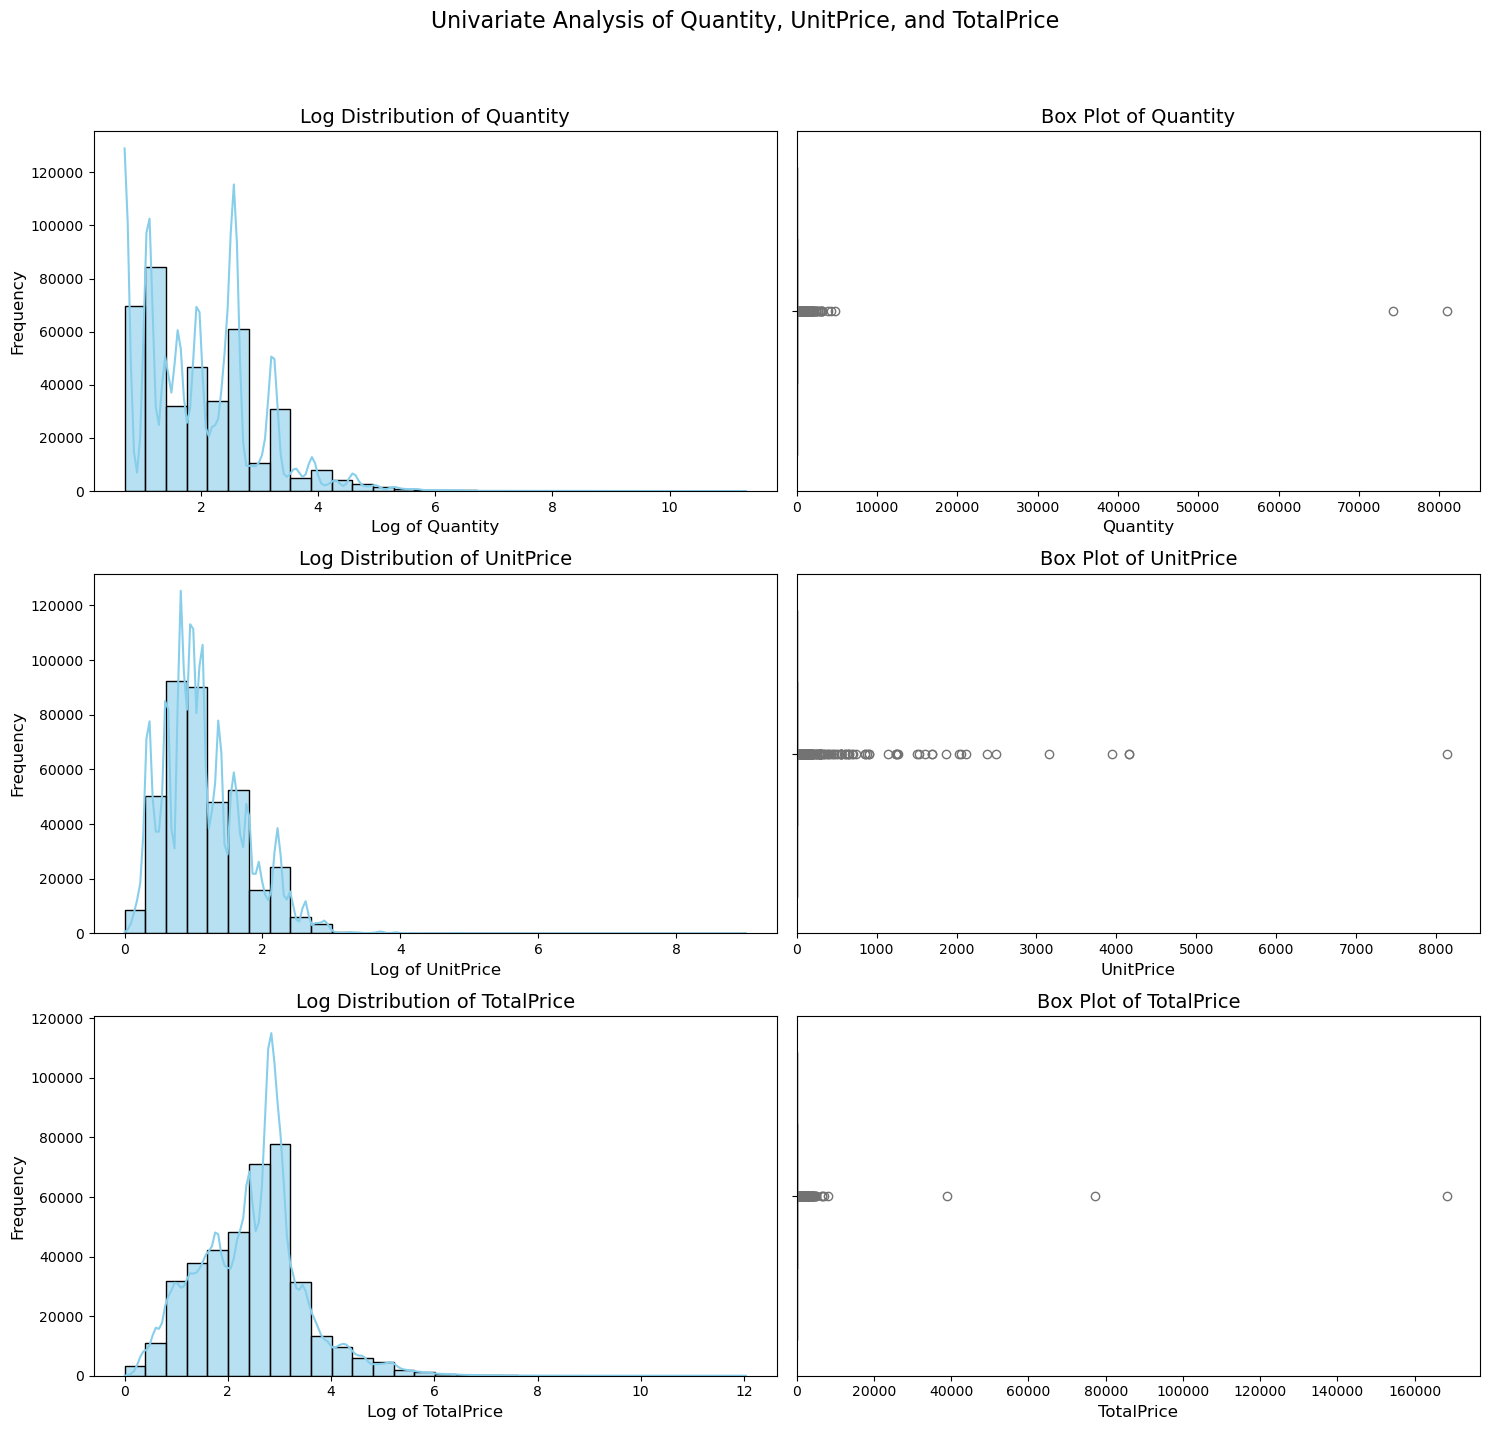

In [78]:
# Select the relevant columns
columns_to_analyze = ['Quantity', 'UnitPrice', 'TotalPrice']

# Create a 3x2 grid for the plots
fig, axes = plt.subplots(3, 2, figsize=(15, 15))  # Adjust figure size as needed
fig.suptitle('Univariate Analysis of Quantity, UnitPrice, and TotalPrice', fontsize=16)

# Iterate over the columns to perform univariate analysis
for i, col in enumerate(columns_to_analyze):
    
    # Histogram with log transformation
    data[col].replace(0, np.nan, inplace=True)  # Avoid log(0)
    log_data = np.log1p(data[col])  # Log transformation
    sns.histplot(log_data, ax=axes[i, 0], kde=True, color='skyblue', bins=30, alpha=0.6)
    axes[i, 0].set_title(f'Log Distribution of {col}', fontsize=14)
    axes[i, 0].set_xlabel(f'Log of {col}', fontsize=12)
    axes[i, 0].set_ylabel('Frequency', fontsize=12)

    # Box plot for original data
    sns.boxplot(x=data[col], ax=axes[i, 1], color='lightgreen')
    axes[i, 1].set_title(f'Box Plot of {col}', fontsize=14)
    axes[i, 1].set_xlabel(col, fontsize=12)
    axes[i, 1].set_xlim(left=0)  # Set x-axis limit to start from 0

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Make room for the suptitle
plt.show()

<p style="font-size:18px; line-height:1.6; font-family: 'Arial', sans-serif;">
   <h5>Observations:</h5></p>
<p><b>Log Distribution of Quantity:</b>
The histogram shows the frequency of quantity values on a logarithmic scale, with most data points concentrated at lower quantities, indicating that many transactions involve purchasing one or a few items.</p>

<p><b>Box Plot of Quantity</b>
This box plot displays the distribution of quantity values, highlighting the median, quartiles, and outliers, suggesting some transactions involve unusually high quantities.</p>

<p><b>Log Distribution of UnitPrice</b>
The histogram depicts the frequency of unit prices on a logarithmic scale, showing a concentration at lower prices, suggesting that most products are affordably priced.</p>

<p><b>Box Plot of UnitPrice</b>
This box plot illustrates the distribution of unit prices, including the median, quartiles, and outliers, indicating a few high-priced items in the dataset.</p>

<p><b>Log Distribution of TotalPrice</b>
The histogram shows the frequency of total prices on a logarithmic scale, with most data points at lower prices, indicating many transactions yield lower revenue, while some contribute significantly more.</p>

<p><b>Box Plot of TotalPrice</b>
This box plot represents the distribution of total prices, showcasing the median, quartiles, and outliers, suggesting certain transactions generate exceptionally high total prices that could impact overall revenue.</p>

### 3. Distribution of Categorical Variable

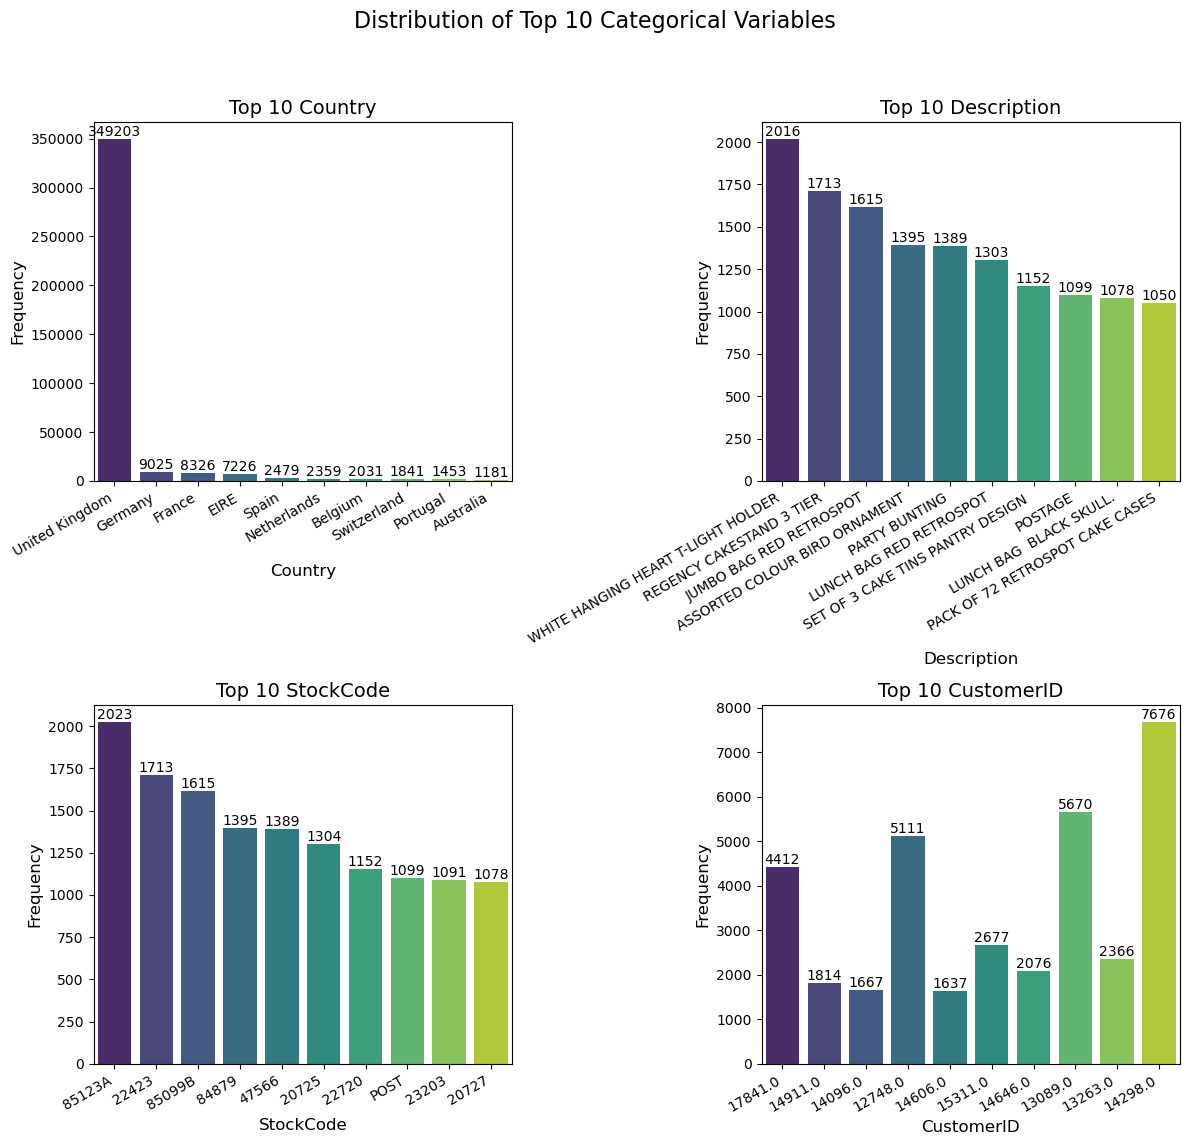

In [79]:
# Set the color palette for the plots
sns.set_palette("pastel")

# Define the categorical columns to plot
categorical_cols = ['Country', 'Description', 'StockCode', 'CustomerID']

# Create a 2x2 grid for the plots
fig, axes = plt.subplots(2, 2, figsize=(12, 12))  # Adjust figure size as needed
fig.suptitle('Distribution of Top 10 Categorical Variables', fontsize=16)

# Iterate over the categorical columns and plot
for ax, col in zip(axes.flatten(), categorical_cols):
    # Get the top 10 values and their counts
    top_values = data[col].value_counts().head(10)
    
    # Bar plot
    sns.barplot(x=top_values.index, 
                y=top_values.values, 
                ax=ax, 
                palette='viridis')
    
    # Set title and labels
    ax.set_title(f'Top 10 {col}', fontsize=14)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    
    # Rotate x-tick labels for better readability
    ax.tick_params(axis='x', rotation=45)  
    
    # Annotate each bar with the count value
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=10)

    # Adjust the x-axis limits to give more space
    ax.set_xticks(range(len(top_values)))
    ax.set_xticklabels(top_values.index, rotation=30, ha='right', fontsize=10)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Make room for the suptitle
plt.show()

<p style="font-size:18px; line-height:1.6; font-family: 'Arial', sans-serif;">
   <h5>Observations:</h5></p>
<p><strong>Top 10 Countries:</strong> The bar plot for the "Country" variable shows that the <strong>UK</strong> has the highest transaction volume, indicating that most sales originate from this country. The dominance of UK-based transactions suggests a primary focus on the domestic market.</p>

<p><strong>Top 10 Descriptions:</strong> The most frequently sold product is the <strong>WHITE HANGING HEART T-LIGHT HOLDER</strong> with a frequency of <strong>2,016</strong> transactions. This highlights the high demand for home decor items among customers.</p>
    
<p><strong>Top 10 StockCodes:</strong> The StockCode <strong>85123A</strong> is the most frequent, appearing in <strong>2,023</strong> transactions. This reinforces the popularity of the product, likely linked to the high-demand item in the descriptions category.</p>

<p><strong>Top 10 CustomerIDs:</strong> The customer with ID <strong>14298</strong> has made the highest number of purchases, totaling <strong>7,676</strong> transactions. This could indicate either a very loyal customer or a bulk buyer, emphasizing the value of such key customers.</p>

<h2>2. Bivariate Analysis</h2>
<p>After completing the univariate analysis, we will move on to exploring relationships between the features to understand how each one interacts with the others, especially in relation to our primary business metric, <strong>TotalPrice</strong>. We will focus on:</p>

<h4>Continuous features vs. TotalPrice:</h4>
<p>We will use <strong>scatter plots</strong> and <strong>correlation heatmaps</strong> to assess how <strong>Quantity</strong> and <strong>UnitPrice</strong> are related to TotalPrice. This will help us identify significant drivers of transaction value.</p>

<h4>Categorical features vs. TotalPrice:</h4>
<p>Using <strong>bar charts</strong>, we will explore how categorical variables such as <strong>Country</strong>, <strong>StockCode</strong>, and <strong>CustomerID</strong> relate to TotalPrice. This can highlight important patterns in customer behavior, geographic trends, and popular products.</p>

### 1.  Continuous Features vs. TotalPrice

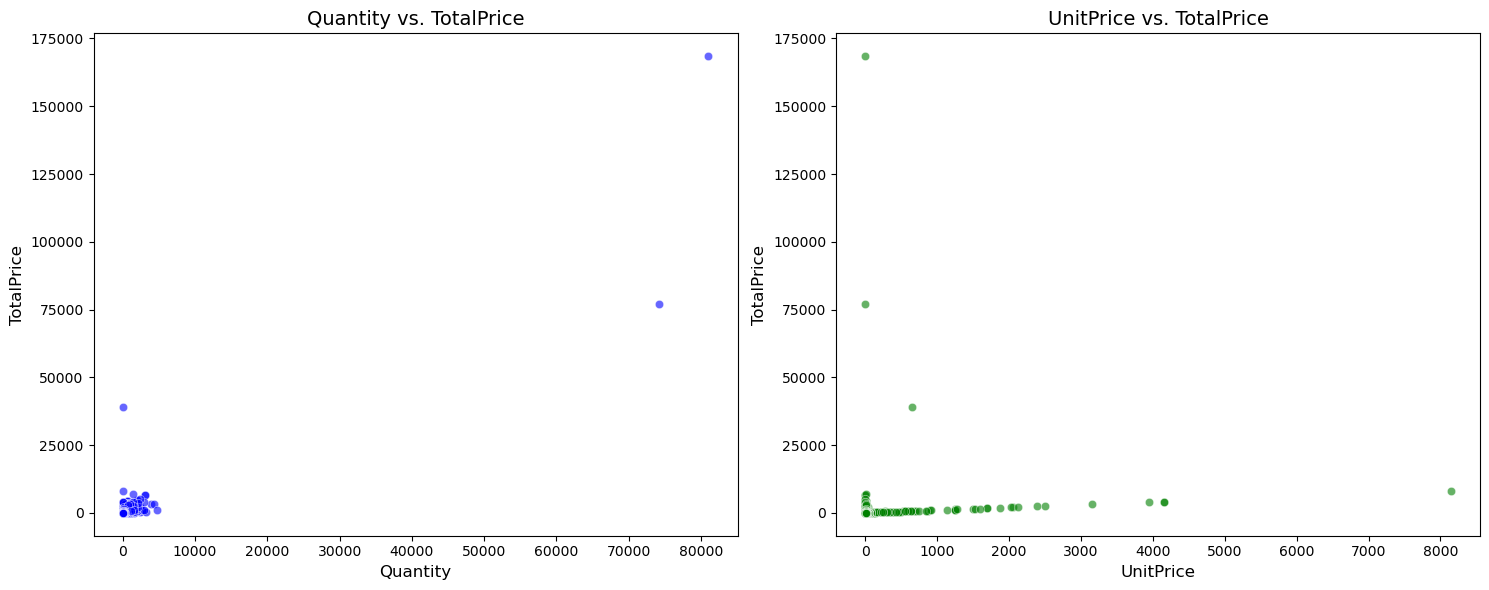

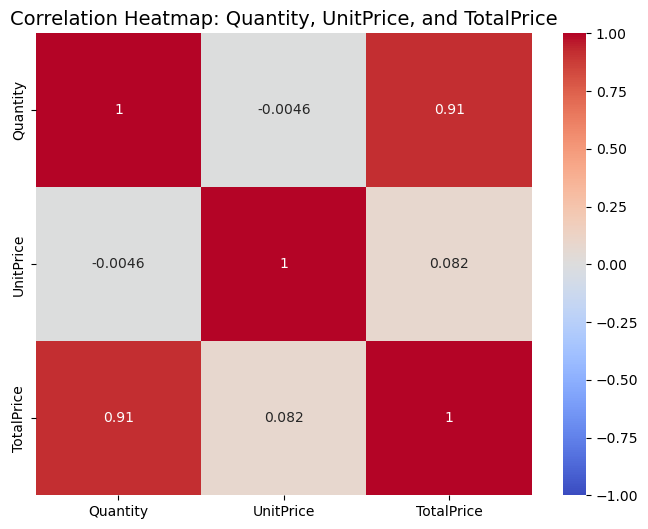

In [80]:
# Scatter Plots: Continuous Features vs. TotalPrice
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Scatter plot for Quantity vs. TotalPrice
sns.scatterplot(x=data['Quantity'], y=data['TotalPrice'], ax=axes[0], color='blue', alpha=0.6)
axes[0].set_title('Quantity vs. TotalPrice', fontsize=14)
axes[0].set_xlabel('Quantity', fontsize=12)
axes[0].set_ylabel('TotalPrice', fontsize=12)

# Scatter plot for UnitPrice vs. TotalPrice
sns.scatterplot(x=data['UnitPrice'], y=data['TotalPrice'], ax=axes[1], color='green', alpha=0.6)
axes[1].set_title('UnitPrice vs. TotalPrice', fontsize=14)
axes[1].set_xlabel('UnitPrice', fontsize=12)
axes[1].set_ylabel('TotalPrice', fontsize=12)

plt.tight_layout()
plt.show()

# Correlation Heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = data[['Quantity', 'UnitPrice', 'TotalPrice']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap: Quantity, UnitPrice, and TotalPrice', fontsize=14)
plt.show()

<p style="font-size:18px; line-height:1.6; font-family: 'Arial', sans-serif;">
   <h5>Observations:</h5></p>
<b>Quantity vs. TotalPrice:</b>
The scatter plot reveals a concentration of points near the origin, indicating that lower quantities purchased are generally associated with lower total prices. This suggests that many transactions involve smaller quantities of items.
Outliers: There are a few outliers with high quantities that correspond to significantly higher total prices, which may represent bulk purchases or promotional sales.
<p><b>UnitPrice vs. TotalPrice:</b>
Similar to the first graph, this scatter plot shows a concentration of points near the origin, suggesting that items with lower unit prices tend to have lower total prices. This implies that lower-priced items dominate the sales transactions.
Higher Values: Some points are scattered towards higher unit prices and total prices, indicating that there are transactions involving more expensive items, contributing to higher overall revenue.</p>
<p><b>Correaltion Heatmap:</b> TotalPrice is highly correlated with Quantity (since TotalPrice = UnitPrice * Quantity), while UnitPrice may not have as strong a correlation with Quantity.</p>

### 2. Top 10 Customers by Revenue

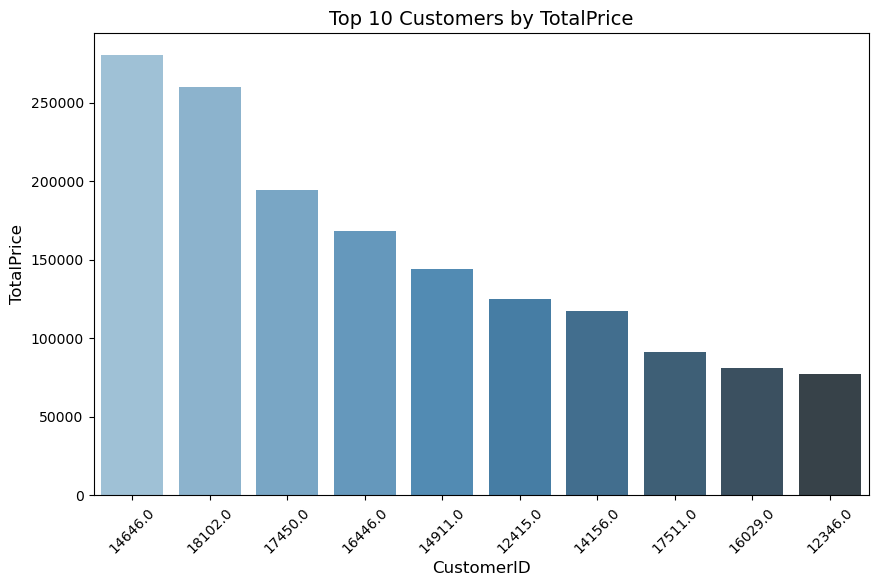

In [81]:
# CustomerID vs TotalPrice (Top 10 Customers by Revenue)
plt.figure(figsize=(10, 6))
top_10_customers = data.groupby('CustomerID')['TotalPrice'].sum().nlargest(10)
sns.barplot(x=top_10_customers.index.astype(str), y=top_10_customers.values, palette="Blues_d")
plt.title('Top 10 Customers by TotalPrice', fontsize=14)
plt.xlabel('CustomerID', fontsize=12)
plt.ylabel('TotalPrice', fontsize=12)
plt.xticks(rotation=45)
plt.show()

<p style="font-size:18px; line-height:1.6; font-family: 'Arial', sans-serif;">
   <h5>Observations:</h5></p>
<p>This graph shows the top 10 customers who contribute the most revenue to the business. You can identify key customers and potentially target them with loyalty programs or personalized marketing strategies.</p>

### 3. Top 10 Countries by Total Revenue

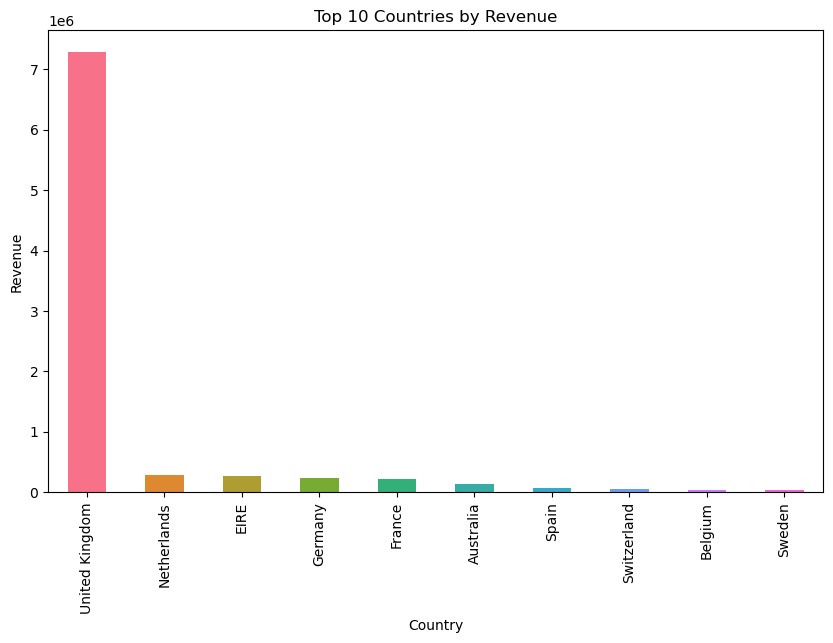

In [82]:
# Country vs TotalPrice (Top 10 Countries by Revenue)
top_countries = data.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)
colors = sns.color_palette('husl', len(top_countries))  

# Plot the top 10 countries by revenue with different colors
top_countries.plot(kind='bar', figsize=(10, 6), color=colors, title='Top 10 Countries by Revenue')

# Add labels and show plot
plt.ylabel('Revenue')
plt.xlabel('Country')
plt.show()

<p style="font-size:18px; line-height:1.6; font-family: 'Arial', sans-serif;">
   <h5>Observations:</h5></p>
<p>UK typically generates the most revenue in such datasets, followed by other countries.</p>
<p>This helps understand where the majority of customers are located, allowing businesses to focus on regions that generate more revenue.</p>

### 4. Top 10 products by quantity sold

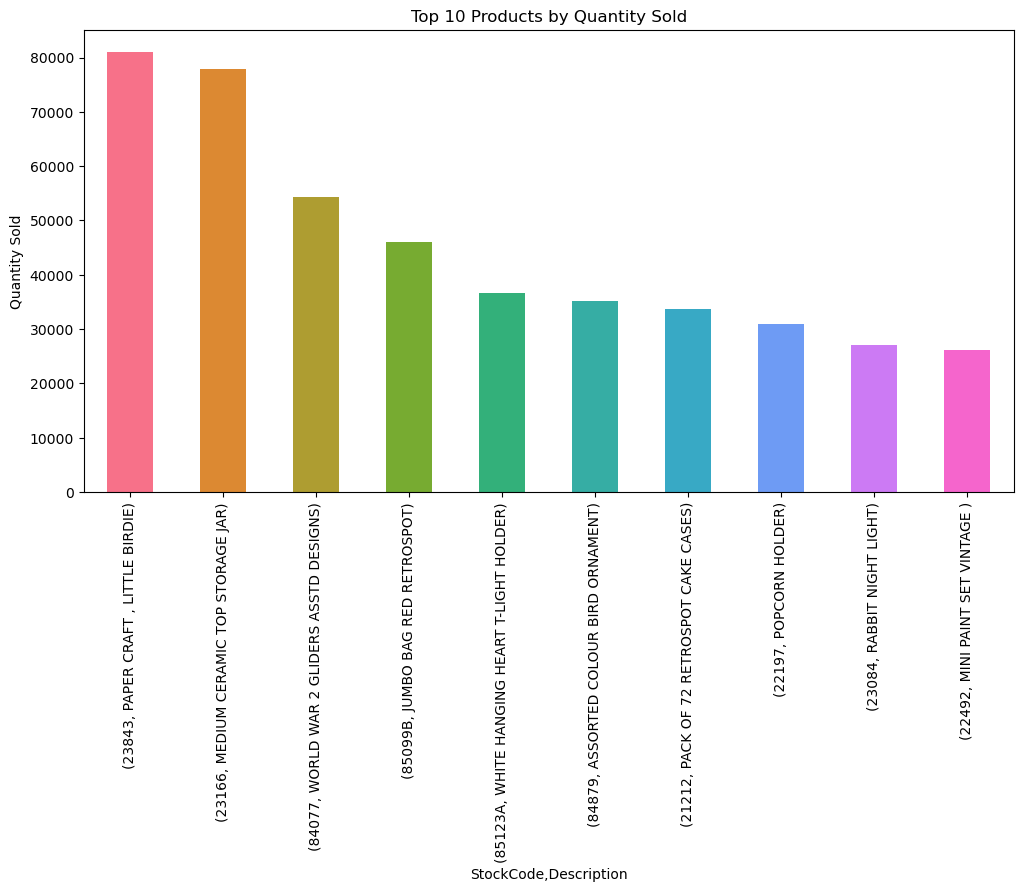

In [83]:
# Product(StockCode, Description) vs Quantity (Top 10 products by quantity sold)
top_products = data.groupby(['StockCode', 'Description'])['Quantity'].sum().sort_values(ascending=False).head(10)
colors = sns.color_palette('husl', len(top_products))  
# Plot top products
top_products.plot(kind='bar', figsize=(12,6), color=colors, title='Top 10 Products by Quantity Sold')
plt.ylabel('Quantity Sold')
plt.show()

<p style="font-size:18px; line-height:1.6; font-family: 'Arial', sans-serif;">
   <h5>Observations:</h5></p>
<p>(23843, PAPER CRAFT, LITTLE BIRDIE) is the highest selling product.</p>
<p>This helps optimize inventory by stocking more of these top-selling products.</p>

### 5. Product vs Country (Heatmap)

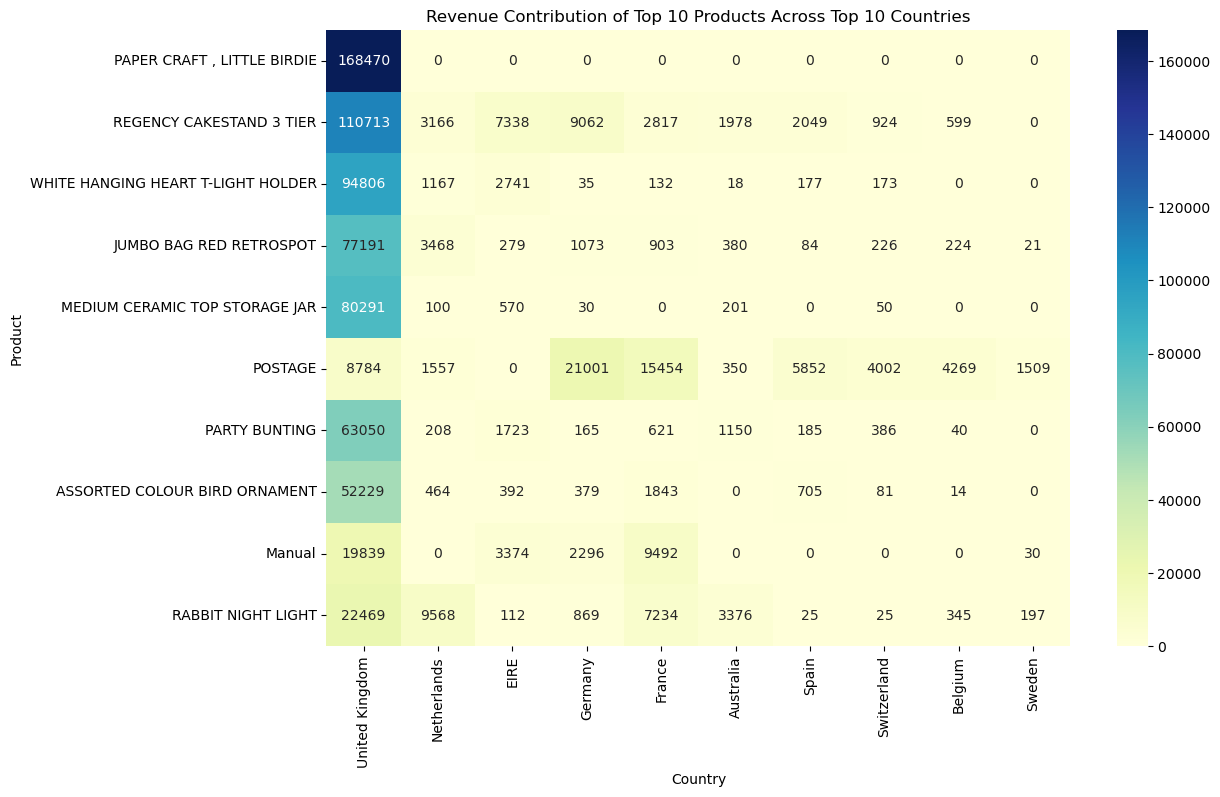

In [84]:
# Pivot table for products and countries
product_country = data.pivot_table(index='Description', columns='Country', values='TotalPrice', aggfunc='sum').fillna(0)

# Select top products and countries
top_products = product_country.sum(axis=1).sort_values(ascending=False).head(10).index
top_countries = product_country.sum(axis=0).sort_values(ascending=False).head(10).index

# Filter the pivot table for top products and countries
product_country_filtered = product_country.loc[top_products, top_countries]

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(product_country_filtered, cmap='YlGnBu', annot=True, fmt=".0f")
plt.title('Revenue Contribution of Top 10 Products Across Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Product')
plt.show()

<p style="font-size:18px; line-height:1.6; font-family: 'Arial', sans-serif;">
   <h5>Observations:</h5></p>
<p>(23843, PAPER CRAFT, LITTLE BIRDIE) is the highest selling product. And popular in only UK.</p>
<p>A heatmap can show the product-country relationship by visually representing the amount of sales in each country for different products.And helps you target specific products in certain countries.</p>

### 6. Monthly Revenue Trend

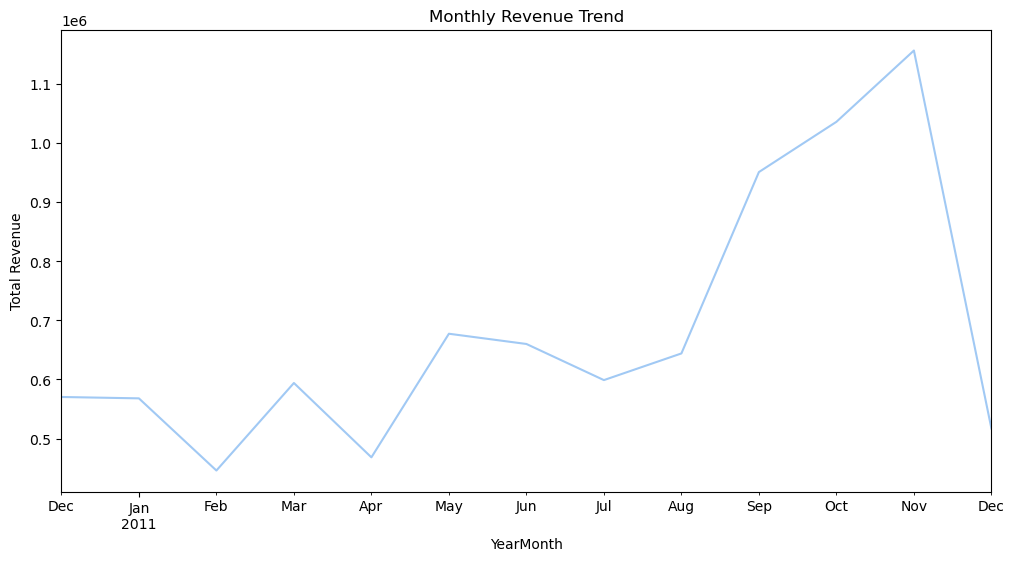

In [85]:
# Month vs TotalPrice
# Create a new column for the year and month
data['YearMonth'] = data['InvoiceDate'].dt.to_period('M')
# Monthly revenue trend
monthly_revenue = data.groupby('YearMonth')['TotalPrice'].sum()

# Plot monthly revenue
monthly_revenue.plot(kind='line', figsize=(12,6), title='Monthly Revenue Trend')
plt.ylabel('Total Revenue')
plt.show()

<p style="font-size:18px; line-height:1.6; font-family: 'Arial', sans-serif;">
   <h5>Observations:</h5></p>
<p>Most of the sale happened in Novmenber month</p>
<p>February Month had least sales.</p>

<h1 style="color:#DBAE58; font-family: 'Arial', sans-serif;">Step 5: Model Building</h1>

<p style="font-size:18px; line-height:1.6; font-family: 'Arial', sans-serif;">
   <h2>RFM Model Analysis:</h2>
   <h3>What is RFM?</h3>
</p>
<p>RFM (Recency, Frequency, Monetary) analysis is a widely used customer segmentation technique in marketing and analytics. It helps businesses understand and categorize their customers based on three key factors:</p>

<li>How recently they made a purchase (Recency),</li>
<li>How frequently they make purchases (Frequency),</li>
<li>How much they spend (Monetary value).</li>
<p>RFM analysis enables businesses to identify and target different customer segments with customized marketing approaches.</p>

<p style="font-size:18px; line-height:1.6; font-family: 'Arial', sans-serif;">
   <h3>Why it is Needed?</h3>
</p>
<p>RFM Analysis is a marketing framework that is used to understand and analyze customer behaviour based on the above three factors Recency, Frequency, and Monetary.</p>

<p>The RFM Analysis will help the businesses to segment their customer base into different homogenous groups so that they can engage with each group with different targeted marketing strategies.</p>

In [86]:
import datetime as dt

# Set a reference date (e.g., max invoice date in the data)
reference_date = data['InvoiceDate'].max()

# Calculate Recency: Days since the customer's last purchase
rfm = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',  # Frequency
    #'Quantity': 'sum',  # Total quantity
    #'UnitPrice': 'mean'  # Mean price per item (for monetary calculation)
})

# Rename columns for clarity
rfm.columns = ['Recency', 'Frequency']

# Calculate Monetary Value
rfm['Monetary'] = data.groupby('CustomerID').apply(lambda x: (x['Quantity'] * x['UnitPrice']).sum())

# Optional: Remove outliers or perform further filtering if needed

# Show the first few rows of the RFM table
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12347.0,1,7,4310.00
12348.0,74,4,1797.24
12349.0,18,1,1757.55
12350.0,309,1,334.40


In [87]:
rfm.Recency.describe()

count    4338.000000
mean       91.536422
std       100.014169
min         0.000000
25%        17.000000
50%        50.000000
75%       141.000000
max       373.000000
Name: Recency, dtype: float64

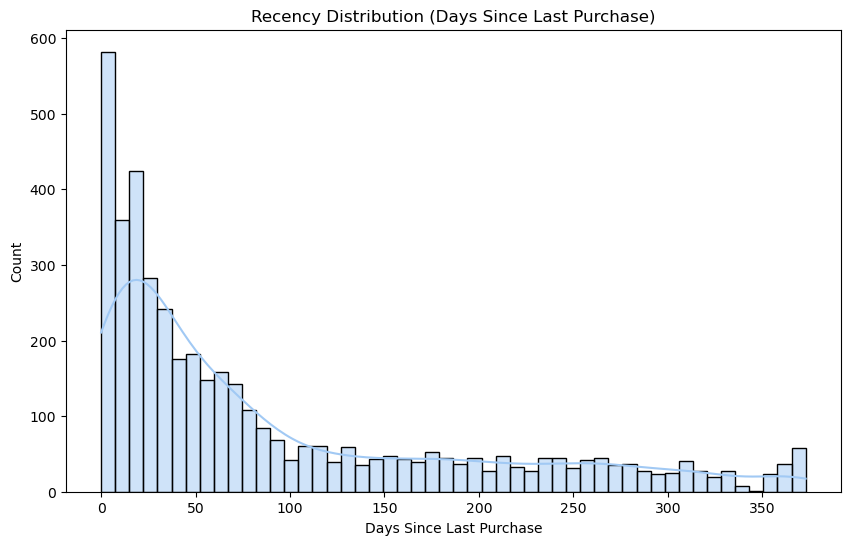

In [88]:
# Recency distribution
plt.figure(figsize=(10,6))
sns.histplot(rfm['Recency'], bins=50, kde=True)
plt.title('Recency Distribution (Days Since Last Purchase)')
plt.xlabel('Days Since Last Purchase')
plt.show()

In [89]:
rfm.Frequency.describe()

count    4338.000000
mean        4.272015
std         7.697998
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       209.000000
Name: Frequency, dtype: float64

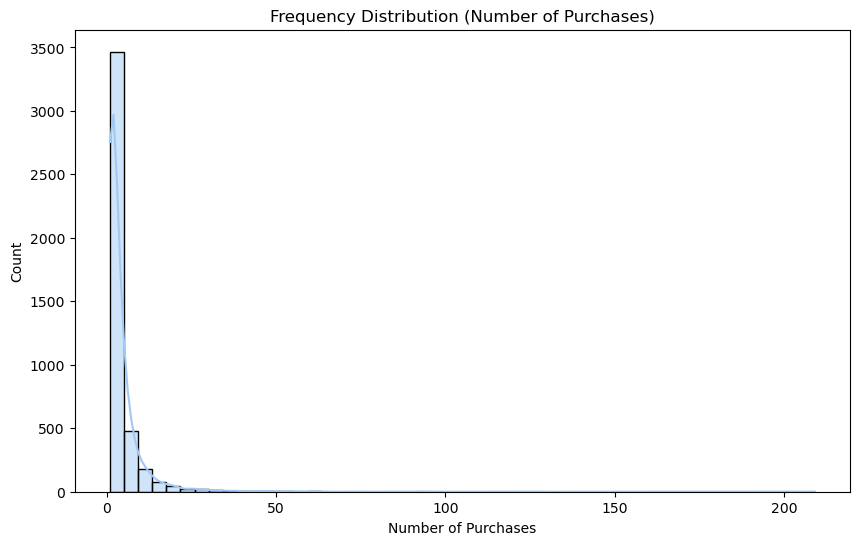

In [90]:
# Frequency distribution
plt.figure(figsize=(10,6))
sns.histplot(rfm['Frequency'], bins=50, kde=True)
plt.title('Frequency Distribution (Number of Purchases)')
plt.xlabel('Number of Purchases')
plt.show()

In [91]:
rfm.Monetary.describe()

count      4338.000000
mean       2048.688081
std        8985.230220
min           3.750000
25%         306.482500
50%         668.570000
75%        1660.597500
max      280206.020000
Name: Monetary, dtype: float64

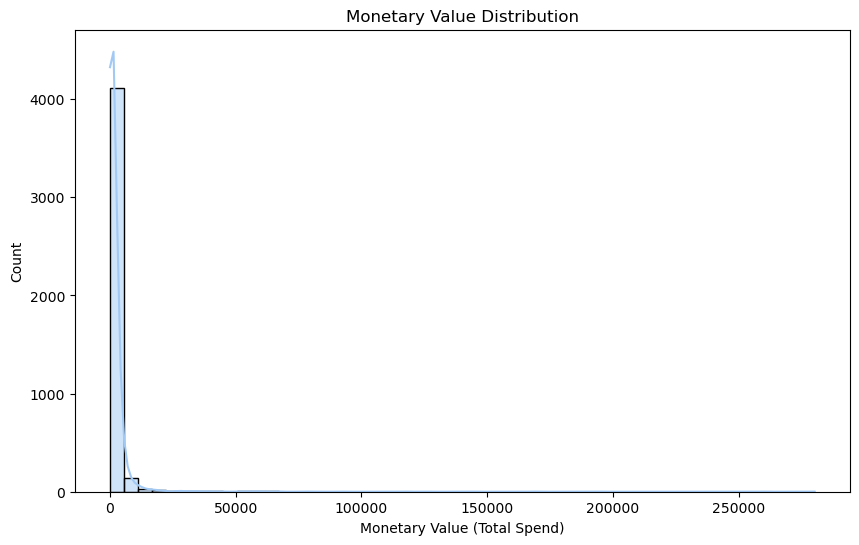

In [92]:
# Monetary distribution
plt.figure(figsize=(10,6))
sns.histplot(rfm['Monetary'], bins=50, kde=True)
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary Value (Total Spend)')
plt.show()

<p style="font-size:18px; line-height:1.6; font-family: 'Arial', sans-serif;">
   RFM (Recency, Frequency, Monetary) dataframe is highly right-skewed, it means that most of the values are concentrated toward the lower end, with a long tail of higher values. In other words, a small number of customers have very high values (e.g., large spending, high frequency of purchases, very recent transactions), while most customers have lower values.
</p>
<h3>Why Skewness Matters:</h3>
<p><b>Impact on Clustering:</b> Right-skewed data can distort distance-based algorithms like K-means and Agglomerative Clustering because the high-value outliers may dominate the clustering process.</p> 
<p><b>Observation:</b> Without transformation, right-skewed data can make it harder to analyze customer segments effectively, as the majority of customers fall into a very small range of values.</p>

<p>To address the right-skewness in your Recency, Frequency, and Monetary data, you can apply transformations that make the data more symmetric. The most commonly used transformation for reducing right skewness is the <b>logarithmic (log) transformation.</b></p>

### Log Transformation:
This works well when your data contains positive values.
Log transformation compresses the range of high values and stretches out the lower range, making the data more normally distributed.

In [93]:
# Apply log transformation
rfm['Log_Recency'] = np.log1p(rfm['Recency'])    # log(1 + Recency) to avoid log(0)
rfm['Log_Frequency'] = np.log1p(rfm['Frequency'])
rfm['Log_Monetary'] = np.log1p(rfm['Monetary'])

# Check skewness before and after transformation
skewness_before = rfm[['Recency', 'Frequency', 'Monetary']].skew()
skewness_after = rfm[['Log_Recency', 'Log_Frequency', 'Log_Monetary']].skew()

# Display skewness results
print("Skewness before log transformation:")
print(skewness_before)

print("\nSkewness after log transformation:")
print(skewness_after)

Skewness before log transformation:
Recency       1.246048
Frequency    12.067031
Monetary     19.339368
dtype: float64

Skewness after log transformation:
Log_Recency     -0.554566
Log_Frequency    1.208652
Log_Monetary     0.396599
dtype: float64


<p style="font-size:18px; line-height:1.6; font-family: 'Arial', sans-serif;">
   <h5>Observations:</h5></p>
<p>The log transformation has effectively reduced the right skewness for all three variables, especially for Monetary and Recency.</p> 
<p>Frequency still has some skewness but is much more manageable than before.</p>

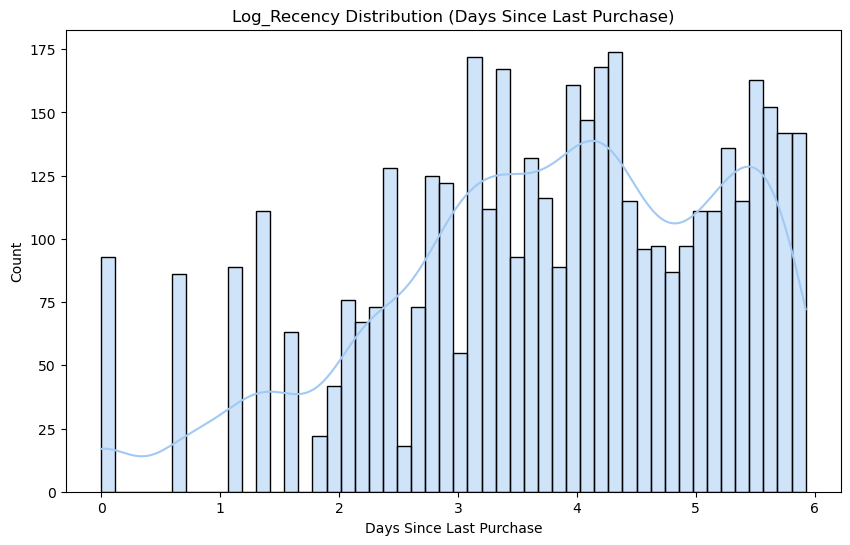

In [94]:
# log_Recency distribution
plt.figure(figsize=(10,6))
sns.histplot(rfm['Log_Recency'], bins=50, kde=True)
plt.title('Log_Recency Distribution (Days Since Last Purchase)')
plt.xlabel('Days Since Last Purchase')
plt.show()

<p style="font-size:18px; line-height:1.6; font-family: 'Arial', sans-serif;">
   <h5>Observations:</h5></p>
<p>Before transformation: Skewness = 1.25 (right-skewed)</p> 
<p>After transformation: Skewness = -0.55 (mild left skew)</p>
<p>The log transformation has successfully reduced the right skewness and brought the distribution closer to normality, though it now has a mild left skew.</p>

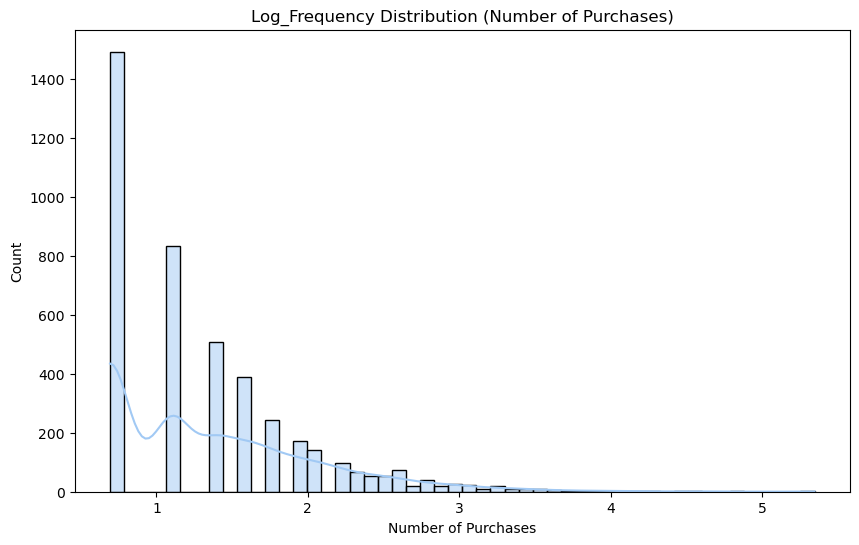

In [95]:
# log_Frequency distribution
plt.figure(figsize=(10,6))
sns.histplot(rfm['Log_Frequency'], bins=50, kde=True)
plt.title('Log_Frequency Distribution (Number of Purchases)')
plt.xlabel('Number of Purchases')
plt.show()

<p style="font-size:18px; line-height:1.6; font-family: 'Arial', sans-serif;">
   <h5>Observations:</h5></p>
<p>Before transformation: Skewness = 12.07 (highly right-skewed)</p> 
<p>After transformation: Skewness = 1.21 (still right-skewed but greatly reduced)</p>
<p>Although still slightly skewed, the transformation significantly reduced the skewness.</p>

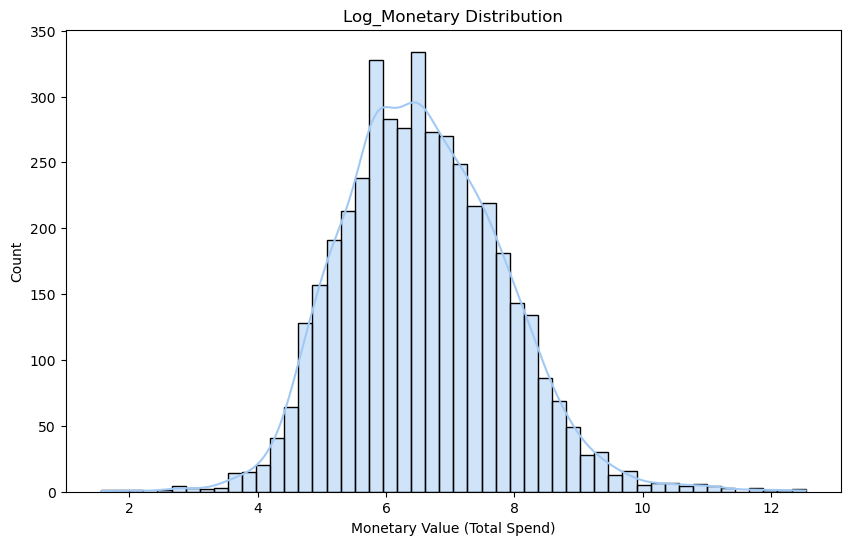

In [96]:
#log_Monetary distribution
plt.figure(figsize=(10,6))
sns.histplot(rfm['Log_Monetary'], bins=50, kde=True)
plt.title('Log_Monetary Distribution')
plt.xlabel('Monetary Value (Total Spend)')
plt.show()

<p style="font-size:18px; line-height:1.6; font-family: 'Arial', sans-serif;">
   <h5>Observations:</h5></p>
<p>Before transformation: Skewness = 19.34 (extremely right-skewed)</p> 
<p>After transformation: Skewness = 0.40 (close to normal)</p>
<p>The skewness for Monetary has reduced dramatically and is now very close to a normal distribution.</p>

In [97]:
rfm.head()

,Recency,Frequency,Monetary,Log_Recency,Log_Frequency,Log_Monetary
CustomerID,,,,,,
12346.0,325,1,77183.60,5.786897,0.693147,11.253955
12347.0,1,7,4310.00,0.693147,2.079442,8.368925
12348.0,74,4,1797.24,4.317488,1.609438,7.494564
12349.0,18,1,1757.55,2.944439,0.693147,7.472245
12350.0,309,1,334.40,5.736572,0.693147,5.815324


In [98]:
# Select the log-transformed RFM columns
log_rfm = rfm[['Log_Recency', 'Log_Frequency', 'Log_Monetary']]

# Step 1: Standard Scaling
scaler = StandardScaler()
log_rfm_scaled = scaler.fit_transform(log_rfm)
log_rfm_scaled

array([[ 1.40989446, -0.95521426,  3.7077163 ],
       [-2.14649825,  1.07442519,  1.41490344],
       [ 0.38397128,  0.38630445,  0.72002428],
       ...,
       [-1.17860486, -0.36158278, -1.11333158],
       [-1.66255156,  2.17800394,  0.82281217],
       [-0.00442205,  0.05960547,  0.73752572]])

# K-means clustering
## Elbow Curve

[6502.133786313935, 4893.294591048978, 3987.6436597715388, 3371.8012841116183, 2901.5887096413985, 2613.755296345743, 2405.143476981506, 2201.345214738757, 2091.323659447394]


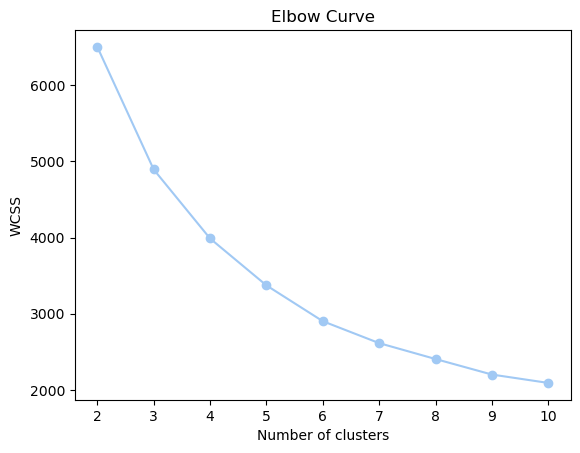

In [99]:
# create an empty list to store wcss values
wcss = []

# loop over different number of clusters to apply K-Means
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(log_rfm_scaled)
    wcss.append(kmeans.inertia_)  # store the wcss for each k

print(wcss)
# plot the elbow curve
plt.plot(range(2, 11), wcss, marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Elbow curve shows the optimal value of k which is k=3 or k=4

For k = 3,

In [100]:
k = 3
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
kmeans.fit(log_rfm_scaled)

KMeans(n_clusters=3, random_state=42)

In [101]:
# Assign clusters to the data
rfm['KMeans_Cluster(k=3)'] = kmeans.labels_

# Analyze the clusters (e.g., calculate the mean values of Recency, Frequency, and Monetary for each cluster)
cluster_analysis = rfm.groupby('KMeans_Cluster(k=3)').agg({'Recency': 'mean',
                                               'Frequency': 'mean',
                                               'Monetary': 'mean'})
print(cluster_analysis)

                        Recency  Frequency     Monetary
KMeans_Cluster(k=3)                                    
0                     46.438389   3.544431  1398.838704
1                    161.228363   1.337331   351.484828
2                     12.924863  13.639344  7994.291339


# Silhouette Coefficient for K-means

[0.4343591972869044, 0.33897314797167083, 0.33561136654962703, 0.31494688003493476, 0.3100686015529931, 0.30399258112264504, 0.2738400424861386, 0.2761618534028656, 0.28639437822489117]


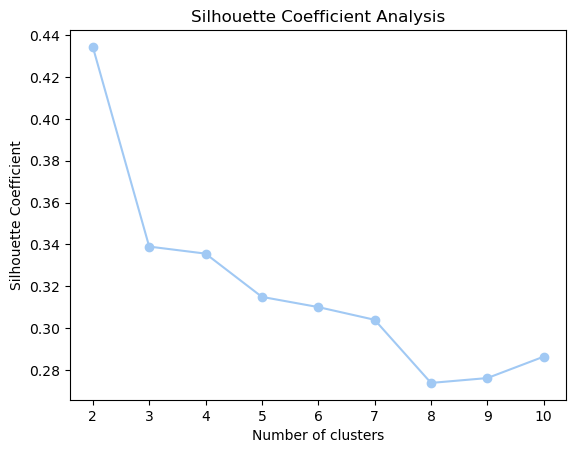

In [102]:
silhouette_coefficients = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(log_rfm_scaled)
    score = silhouette_score(log_rfm_scaled, kmeans.labels_)
    silhouette_coefficients.append(score)

print(silhouette_coefficients)

plt.plot(range(2, 11), silhouette_coefficients, marker='o')
plt.title('Silhouette Coefficient Analysis')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()

<p style="font-size:18px; line-height:1.6; font-family: 'Arial', sans-serif;">
   <h5>Observations:</h5></p>
<p>highest score is for k=2 (0.4344) and for k=3(0.3392)</p>

<p>so, we will try k=2 in k-means</p>

In [103]:
k = 2
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
kmeans.fit(log_rfm_scaled)

KMeans(n_clusters=2, random_state=42)

In [104]:
# Assign clusters to the data
rfm['KMeans_Cluster(k=2)'] = kmeans.labels_

# Analyze the clusters (e.g., calculate the mean values of Recency, Frequency, and Monetary for each cluster)
cluster_analysis = rfm.groupby('KMeans_Cluster(k=2)').agg({'Recency': 'mean',
                                               'Frequency': 'mean',
                                               'Monetary': 'mean'})
print(cluster_analysis)

                        Recency  Frequency     Monetary
KMeans_Cluster(k=2)                                    
0                    132.702572   1.676854   498.221954
1                     24.800000   8.479154  4562.223197


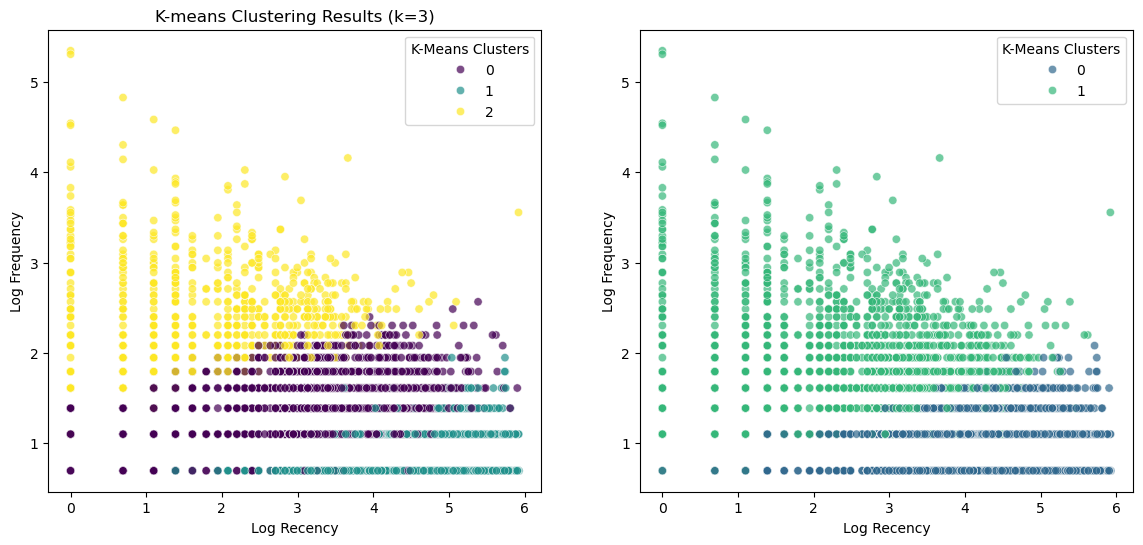

In [105]:
# Scatter plot for clusters
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
sns.scatterplot(data=rfm, x='Log_Recency', y='Log_Frequency', hue='KMeans_Cluster(k=3)', palette='viridis', alpha=0.7)

plt.title('K-means Clustering Results (k=3)')
plt.xlabel('Log Recency')
plt.ylabel('Log Frequency')
plt.legend(title='K-Means Clusters')


plt.subplot(1,2,2)
sns.scatterplot(data=rfm, x='Log_Recency', y='Log_Frequency', hue='KMeans_Cluster(k=2)', palette='viridis', alpha=0.7)
plt.xlabel('Log Recency')
plt.ylabel('Log Frequency')
plt.legend(title='K-Means Clusters')
plt.show()

In [106]:
rfm.head()

,Recency,Frequency,Monetary,Log_Recency,Log_Frequency,Log_Monetary,KMeans_Cluster(k=3),KMeans_Cluster(k=2)
CustomerID,,,,,,,,
12346.0,325,1,77183.60,5.786897,0.693147,11.253955,0,1
12347.0,1,7,4310.00,0.693147,2.079442,8.368925,2,1
12348.0,74,4,1797.24,4.317488,1.609438,7.494564,0,1
12349.0,18,1,1757.55,2.944439,0.693147,7.472245,0,0
12350.0,309,1,334.40,5.736572,0.693147,5.815324,1,0


# Hierarchical clustering

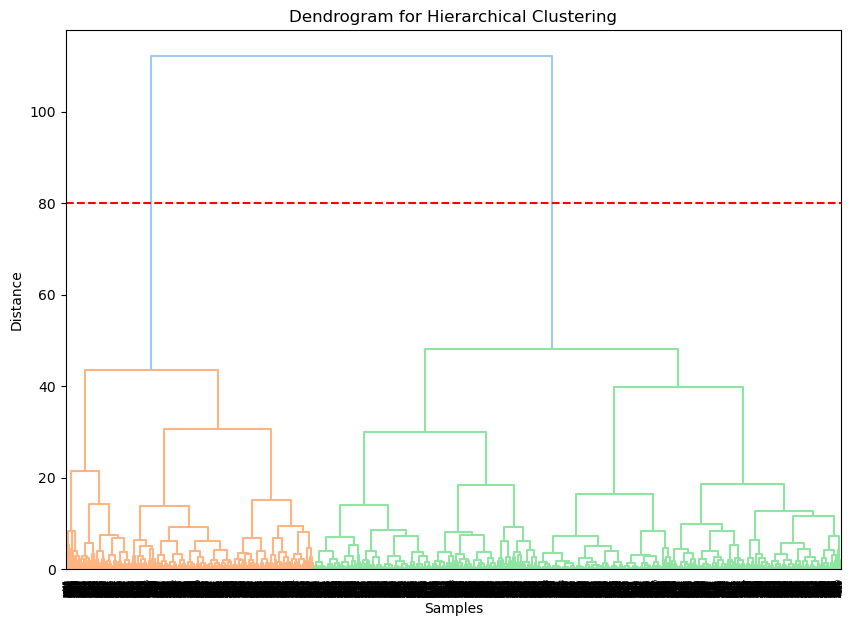

In [107]:
# Generate the linkage matrix
linkage_matrix = sch.linkage(log_rfm_scaled, method='ward')

# Create the dendrogram
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(linkage_matrix)
plt.axhline(y=80, color='r', linestyle='--')
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

<p style="font-size:18px; line-height:1.6; font-family: 'Arial', sans-serif;">
   Based on the analysis of the dendrogram, it can be concluded that an optimal number of clusters is k=2.
</p>

In [108]:
# Perform agglomerative clustering
n_clusters = 2  
agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
rfm['Agglo_Cluster'] = agglo.fit_predict(log_rfm_scaled)

In [109]:
# Analyze the clusters
cluster_analysis = rfm.groupby('Agglo_Cluster').agg({'Recency': 'mean',
                                                                     'Frequency': 'mean',
                                                                     'Monetary': 'mean'})
print(cluster_analysis)

                  Recency  Frequency     Monetary
Agglo_Cluster                                    
0              123.162996   1.791935   627.239049
1               24.247296   9.548666  5072.982308


# Silhouette Coefficient for Hierarchical clustering

[0.4288523934407704, 0.2776508535067735, 0.25164243456767, 0.2538313369729523, 0.24249786666425555, 0.25697271880208145, 0.25756545514449386, 0.24905136780697076, 0.24329901584371894]


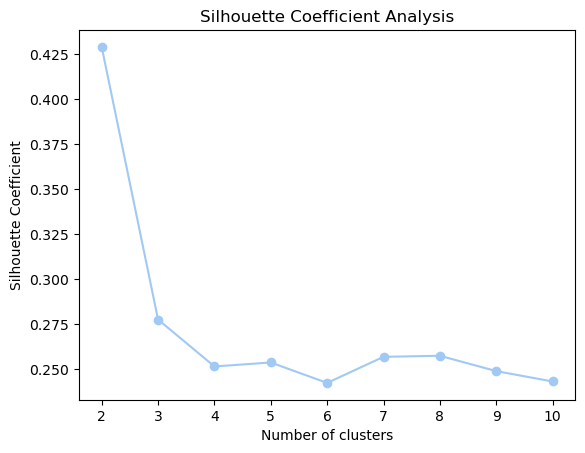

In [110]:
silhouette_coefficients = []
for i in range(2, 11):
    agglo = AgglomerativeClustering(n_clusters=i, linkage='ward')
    agglo.fit(log_rfm_scaled)
    score = silhouette_score(log_rfm_scaled, agglo.labels_)
    silhouette_coefficients.append(score)

print(silhouette_coefficients)

plt.plot(range(2, 11), silhouette_coefficients, marker='o')
plt.title('Silhouette Coefficient Analysis')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()

<p style="font-size:18px; line-height:1.6; font-family: 'Arial', sans-serif;">
   <h5>Observations:</h5></p>
<p>highest score is for k=2 (0.42885)</p>


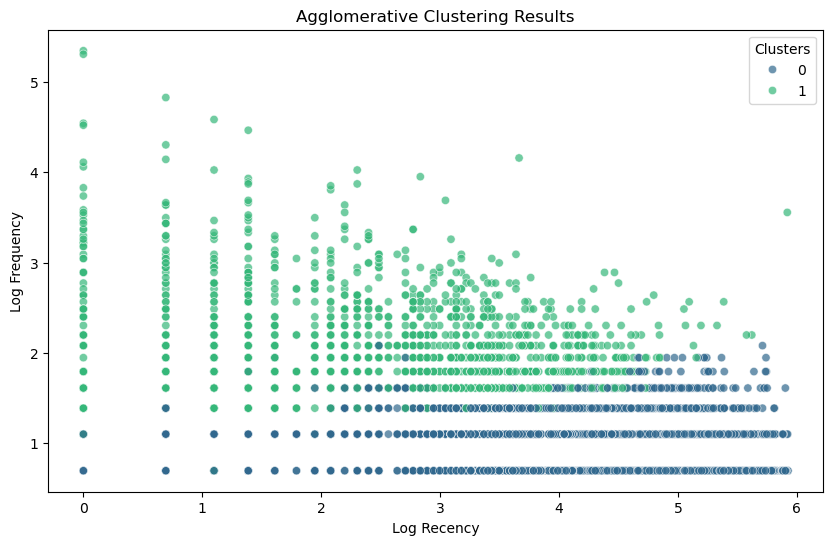

In [111]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x='Log_Recency', y='Log_Frequency', hue='Agglo_Cluster', palette='viridis', alpha=0.7)
plt.title('Agglomerative Clustering Results')
plt.xlabel('Log Recency')
plt.ylabel('Log Frequency')
plt.legend(title='Clusters')
plt.show()

In [112]:
rfm.head()

,Recency,Frequency,Monetary,Log_Recency,Log_Frequency,Log_Monetary,KMeans_Cluster(k=3),KMeans_Cluster(k=2),Agglo_Cluster
CustomerID,,,,,,,,,
12346.0,325,1,77183.60,5.786897,0.693147,11.253955,0,1,0
12347.0,1,7,4310.00,0.693147,2.079442,8.368925,2,1,1
12348.0,74,4,1797.24,4.317488,1.609438,7.494564,0,1,1
12349.0,18,1,1757.55,2.944439,0.693147,7.472245,0,0,0
12350.0,309,1,334.40,5.736572,0.693147,5.815324,1,0,0


# DBSCAN

[0.2648255978480851, 0.5567042858851976]


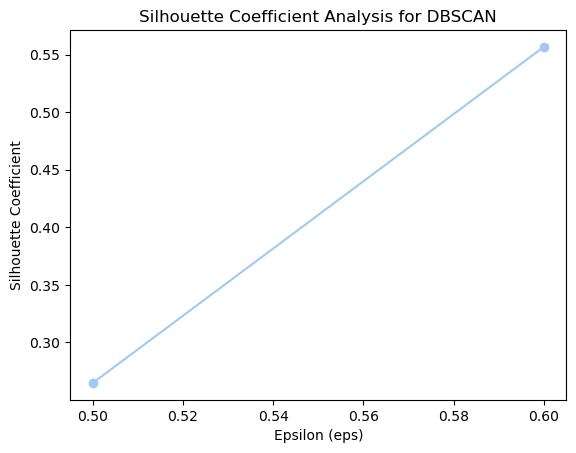

In [113]:
silhouette_coefficients = []
eps_values = 0.5, 0.6  # Different eps values to try

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    dbscan.fit(log_rfm_scaled)

    # Check if more than 1 cluster is found (DBSCAN can return -1 for noise points)
    if len(set(dbscan.labels_)) > 1:
        score = silhouette_score(log_rfm_scaled, dbscan.labels_)
    else:
        score = -1  # Invalid silhouette score if there is only 1 cluster

    silhouette_coefficients.append(score)
print(silhouette_coefficients)
# Plot the silhouette scores for different eps values
plt.plot(eps_values, silhouette_coefficients, marker='o')
plt.title('Silhouette Coefficient Analysis for DBSCAN')
plt.xlabel('Epsilon (eps)')
plt.ylabel('Silhouette Coefficient')
plt.show()

In [114]:
# set parameters for DBScan
eps = 0.5  # Adjust this based on your data
min_samples = 5  # Minimum number of samples for a point to be a core point

# Fit DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
rfm['DBSCAN_Cluster(0.5)'] = dbscan.fit_predict(log_rfm_scaled)

# Analyze the clusters
cluster_analysis = rfm.groupby('DBSCAN_Cluster(0.5)').agg({'Recency': 'mean',
                                                       'Frequency': 'mean',
                                                       'Monetary': 'mean'})
print(cluster_analysis)

                        Recency  Frequency      Monetary
DBSCAN_Cluster(0.5)                                     
-1                    51.921875  33.343750  42657.941406
 0                    58.192184   5.347078   2019.102400
 1                   155.868013   1.000000    354.090270


In [115]:
# set parameters for DBScan
eps = 0.6  # Adjust this based on your data
min_samples = 5  # Minimum number of samples for a point to be a core point

# Fit DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
rfm['DBSCAN_Cluster(0.6)'] = dbscan.fit_predict(log_rfm_scaled)

# Analyze the clusters
cluster_analysis = rfm.groupby('DBSCAN_Cluster(0.6)').agg({'Recency': 'mean',
                                                      'Frequency': 'mean',
                                                      'Monetary': 'mean'})
print(cluster_analysis)

                       Recency  Frequency      Monetary
DBSCAN_Cluster(0.6)                                    
-1                   48.634146  45.365854  61321.631951
 0                   91.945776   3.879916   1483.132880


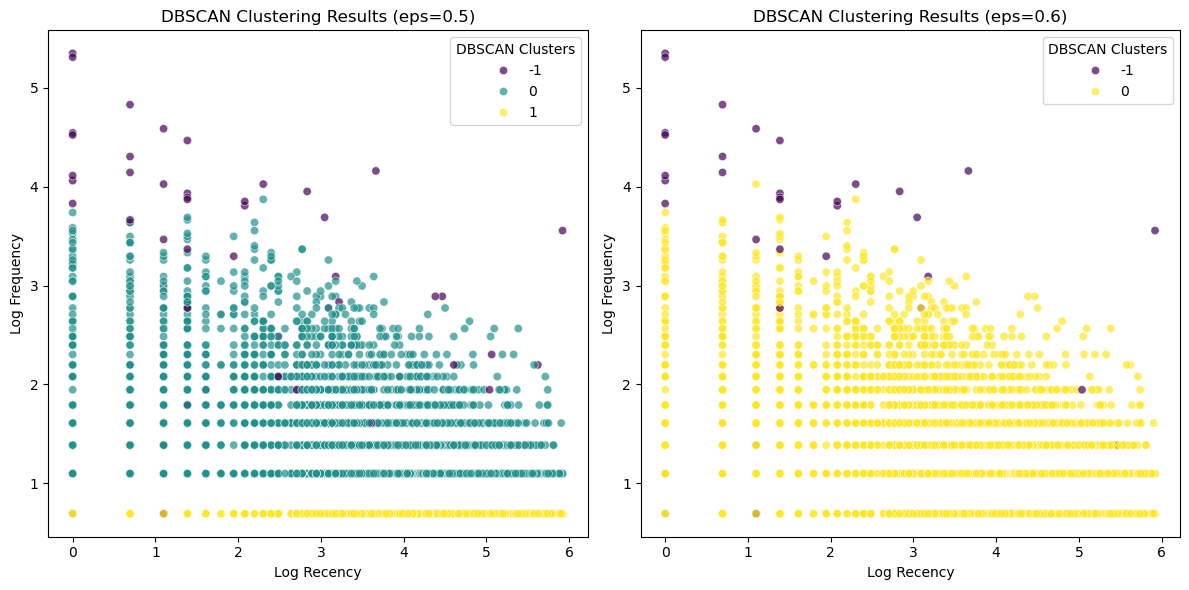

In [116]:
# Visualization for eps = 0.5

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=rfm, x='Log_Recency', y='Log_Frequency', hue='DBSCAN_Cluster(0.5)', palette='viridis', alpha=0.7)
plt.title('DBSCAN Clustering Results (eps=0.5)')
plt.xlabel('Log Recency')
plt.ylabel('Log Frequency')
plt.legend(title='DBSCAN Clusters')

# Visualization for eps = 0.6

plt.subplot(1, 2, 2)
sns.scatterplot(data=rfm, x='Log_Recency', y='Log_Frequency', hue='DBSCAN_Cluster(0.6)', palette='viridis', alpha=0.7)
plt.title('DBSCAN Clustering Results (eps=0.6)')
plt.xlabel('Log Recency')
plt.ylabel('Log Frequency')
plt.legend(title='DBSCAN Clusters')

plt.tight_layout()
plt.show()

<p style="font-size:18px; line-height:1.6; font-family: 'Arial', sans-serif;">
   <h5>Observations:</h5></p>
<p>DBSCAN yielded clusters but also produced a significant amount of noise, making it less effective for your dataset, especially with eps = 0.5 and 0.6.</p>

In [117]:
rfm.head()

,Recency,Frequency,Monetary,Log_Recency,Log_Frequency,Log_Monetary,KMeans_Cluster(k=3),KMeans_Cluster(k=2),Agglo_Cluster,DBSCAN_Cluster(0.5),DBSCAN_Cluster(0.6)
CustomerID,,,,,,,,,,,
12346.0,325,1,77183.60,5.786897,0.693147,11.253955,0,1,0,-1,-1
12347.0,1,7,4310.00,0.693147,2.079442,8.368925,2,1,1,0,0
12348.0,74,4,1797.24,4.317488,1.609438,7.494564,0,1,1,0,0
12349.0,18,1,1757.55,2.944439,0.693147,7.472245,0,0,0,1,0
12350.0,309,1,334.40,5.736572,0.693147,5.815324,1,0,0,1,0


## Silhouette score for comparison
<table border="1" cellpadding="10" cellspacing="0">
  <thead>
    <tr>
      <th>Method</th>
      <th>k=2</th>
      <th>k=3</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>K-means</td>
      <td>0.434359</td>
      <td>0.33921</td>
    </tr>
    <tr>
      <td>Agglomerative</td>
      <td>0.42885</td>
      <td>-</td>
    </tr>
    <tr>
      <td>DBSCAN(eps=0.5)</td>
      <td>0.2648</td>
      <td>-</td>
    </tr>  
  </tbody>
</table>


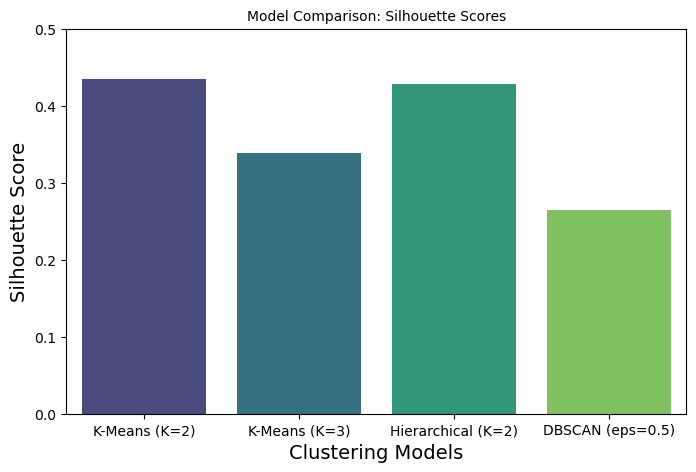

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data for plotting
models = ['K-Means (K=2)', 'K-Means (K=3)', 'Hierarchical (K=2)', 'DBSCAN (eps=0.5)']
silhouette_scores = [0.4344, 0.3389, 0.4287, 0.2648]

# Create a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=silhouette_scores, palette='viridis')

# Add titles and labels
plt.title('Model Comparison: Silhouette Scores', fontsize=10)
plt.xlabel('Clustering Models', fontsize=14)
plt.ylabel('Silhouette Score', fontsize=14)

# Show the plot
plt.ylim(0, 0.5)  # Set the y-axis limits for better visualization
plt.axhline(y=0, color='black', linewidth=0.5)
plt.show()

<p style="font-size:18px; line-height:1.6; font-family: 'Arial', sans-serif;">
   <h5>Observations:</h5></p>
<p>K-Means (K=2) showed the highest silhouette score of 0.4344, indicating well-defined clusters.​</p>

<p>Hierarchical Clustering (K=2) also demonstrated strong cluster separation with a silhouette score of 0.4287.​</p>

<p>DBSCAN with an Eps value of 0.5 produced a silhouette score of 0.2648, indicating significant noise and less reliable clustering.​</p>

<p style="font-size:18px; line-height:1.6; font-family: 'Arial', sans-serif;">
   <h5>Final Result</h5></p>
<p>K-means performed best with K = 2, indicating better-defined clusters.</p>

In [119]:
# Calculate customer count per cluster
cluster_profile = rfm.groupby('KMeans_Cluster(k=2)').agg({
    'Recency': ['mean', 'median', 'std'],
    'Frequency': ['mean', 'median', 'std'],
    'Monetary': ['mean', 'median', 'std'],
})

# Flatten multi-level columns
cluster_profile.columns = ['Recency_Mean', 'Recency_Median', 'Recency_Std', 
                           'Frequency_Mean', 'Frequency_Median', 'Frequency_Std', 
                           'Monetary_Mean', 'Monetary_Median', 'Monetary_Std']

# Add customer count per cluster
cluster_profile['Customer_Count'] = rfm['KMeans_Cluster(k=2)'].value_counts().sort_index()

cluster_profile


,Recency_Mean,Recency_Median,Recency_Std,Frequency_Mean,Frequency_Median,Frequency_Std,Monetary_Mean,Monetary_Median,Monetary_Std,Customer_Count
KMeans_Cluster(k=2),,,,,,,,,,
0,132.702572,95.0,105.269553,1.676854,1.0,0.916099,498.221954,363.65,462.486355,2683
1,24.800000,15.0,32.467273,8.479154,6.0,11.197713,4562.223197,2073.43,14181.954243,1655


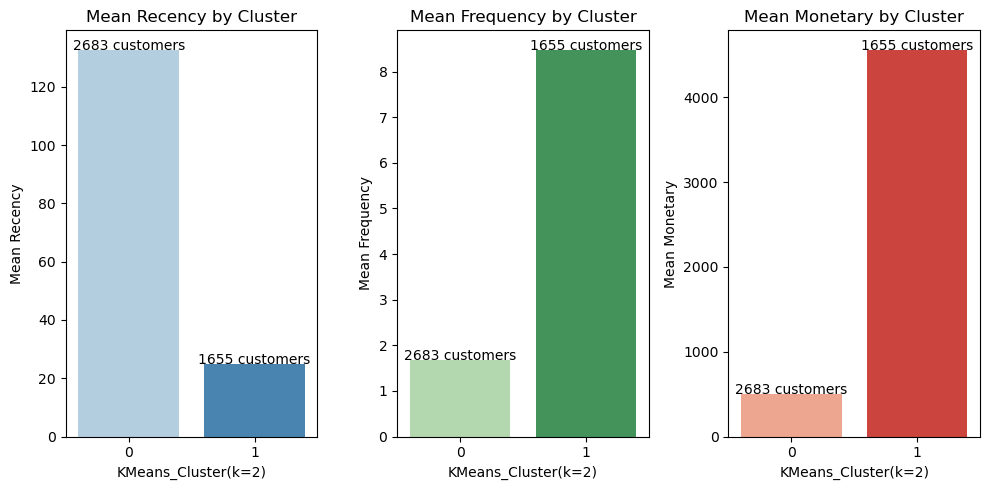

In [129]:
# Bar plot for mean Recency, Frequency, and Monetary values by cluster with customer count annotation
plt.figure(figsize=(10, 5))

# Recency
plt.subplot(1, 3, 1)
sns.barplot(x=cluster_profile.index, y='Recency_Mean', data=cluster_profile, palette='Blues')
plt.title('Mean Recency by Cluster')
plt.ylabel('Mean Recency')
for i, row in cluster_profile.iterrows():
    plt.text(i, row['Recency_Mean'], f'{int(row["Customer_Count"])} customers', ha='center')

# Frequency
plt.subplot(1, 3, 2)
sns.barplot(x=cluster_profile.index, y='Frequency_Mean', data=cluster_profile, palette='Greens')
plt.title('Mean Frequency by Cluster')
plt.ylabel('Mean Frequency')
for i, row in cluster_profile.iterrows():
    plt.text(i, row['Frequency_Mean'], f'{int(row["Customer_Count"])} customers', ha='center')

# Monetary
plt.subplot(1, 3, 3)
sns.barplot(x=cluster_profile.index, y='Monetary_Mean', data=cluster_profile, palette='Reds')
plt.title('Mean Monetary by Cluster')
plt.ylabel('Mean Monetary')
for i, row in cluster_profile.iterrows():
    plt.text(i, row['Monetary_Mean'], f'{int(row["Customer_Count"])} customers', ha='center')

plt.tight_layout()
plt.show()

<h1>Cluster Profiling Interpretation</h1>
<hr>

<h4>Cluster 0: "Low-Value, At-Risk Customers"</h4>

<ul>
    <li><strong>Customer Count:</strong> 2,683 (Approximately 62.2% of the total customers)</li>
    <li><strong>Recency:</strong>
        <ul>
            <li><strong>Mean:</strong> 132.70 days</li>
            <li><strong>Median:</strong> 95.0 days</li>
            <li><strong>Interpretation:</strong> On average, customers in this cluster haven't engaged with your business for over 4 months. The high standard deviation (105.27) indicates a wide variation in recency, meaning some customers are slightly more recent while others are significantly inactive.</li>
        </ul>
    </li>
    <li><strong>Frequency:</strong>
        <ul>
            <li><strong>Mean:</strong> 1.68 purchases</li>
            <li><strong>Median:</strong> 1.0</li>
            <li><strong>Interpretation:</strong> These customers make purchases infrequently, averaging less than 2 transactions. The median being 1 suggests that a substantial portion has only made a single purchase.</li>
        </ul>
    </li>
    <li><strong>Monetary:</strong>
        <ul>
            <li><strong>Mean:</strong> $498.22</li>
            <li><strong>Median:</strong> $363.65</li>
            <li><strong>Interpretation:</strong> The average spend is moderate, but the high standard deviation ($462.49) indicates considerable variability. Many customers spend around $363, while some outliers spend significantly more.</li>
        </ul>
    </li>
    <li><strong>Profile Summary:</strong>
        <ul>
            <li><strong>Engagement Level:</strong> Low</li>
            <li><strong>Purchase Behavior:</strong> Infrequent and moderate spending</li>
            <li><strong>Potential Risk:</strong> High likelihood of churn due to inactivity and low engagement</li>
        </ul>
    </li>
    <li><strong>Business Implications:</strong>
        <ul>
            <li><strong>Retention Strategies:</strong> Implement re-engagement campaigns, such as personalized offers or reminders, to encourage these customers to make another purchase.</li>
            <li><strong>Cost Management:</strong> Consider reducing marketing spend on this segment if reactivation efforts yield low returns, focusing resources instead on higher-value segments.</li>
            <li><strong>Upselling Opportunities:</strong> Introduce incentives for increased spending, like discounts on bulk purchases or loyalty points.</li>
        </ul>
    </li>
</ul>

<hr>

<h4>Cluster 1: "High-Value, Loyal Customers"</h4>

<ul>
    <li><strong>Customer Count:</strong> 1,655 (Approximately 38.8% of the total customers)</li>
    <li><strong>Recency:</strong>
        <ul>
            <li><strong>Mean:</strong> 24.80 days</li>
            <li><strong>Median:</strong> 15.0 days</li>
            <li><strong>Interpretation:</strong> Customers in this cluster are highly active, having engaged with your business within the last month. The relatively low standard deviation (32.47) suggests consistent recent activity across the cluster.</li>
        </ul>
    </li>
    <li><strong>Frequency:</strong>
        <ul>
            <li><strong>Mean:</strong> 8.48 purchases</li>
            <li><strong>Median:</strong> 6.0</li>
            <li><strong>Interpretation:</strong> These customers make frequent purchases, averaging over 8 transactions. The median of 6 indicates that most customers are repeat purchasers, reflecting strong loyalty.</li>
        </ul>
    </li>
    <li><strong>Monetary:</strong>
        <ul>
            <li><strong>Mean:</strong> $4,562.22</li>
            <li><strong>Median:</strong> $2,073.43</li>
            <li><strong>Interpretation:</strong> The average spend is significantly high, with a median of over $2,000. The large standard deviation ($14,181.95) suggests that while many spend moderately, a few are extremely high spenders, boosting the mean.</li>
        </ul>
    </li>
    <li><strong>Profile Summary:</strong>
        <ul>
            <li><strong>Engagement Level:</strong> High</li>
            <li><strong>Purchase Behavior:</strong> Frequent and substantial spending</li>
            <li><strong>Loyalty:</strong> Strong, with potential for brand advocacy</li>
        </ul>
    </li>
    <li><strong>Business Implications:</strong>
        <ul>
            <li><strong>Loyalty Programs:</strong> Enhance retention by offering exclusive rewards, early access to new products, or personalized services.</li>
            <li><strong>Upselling and Cross-Selling:</strong> Introduce premium products or complementary services tailored to their preferences to maximize revenue.</li>
            <li><strong>Customer Advocacy:</strong> Encourage satisfied customers to become brand ambassadors through referral programs or testimonials, leveraging their positive experiences to attract new customers.</li>
        </ul>
    </li>
</ul>



<h1 style="color:#DBAE58; font-family: 'Arial', sans-serif;">Step 6: Conclusion</h1>

<p>The <strong>k=2(K-Means)</strong> clustering solution effectively segments your customer base into:</p>

<ol>
    <li><strong>High-Value, Loyal Customers (Cluster 1):</strong> A smaller but highly profitable segment that requires nurturing to sustain their loyalty and maximize their lifetime value.</li>
    <li><strong>Low-Value, At-Risk Customers (Cluster 0):</strong> A larger segment that presents both challenges and opportunities for re-engagement and revenue growth.</li>
</ol>

<p>By leveraging these insights, you can implement targeted strategies that not only enhance customer satisfaction and retention but also drive significant business growth.</p>